<a href="https://colab.research.google.com/github/alexxriv/fraudDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alejandro Terrazas Rivera 421006692<br />
Luís Manuel Gonzalez Hidalgo 317051322<br />
Juan Manuel Díaz Quiñonez 420004365<br />
Emmanuel Adolfo Méndez Retana 723034238

#Descargando datos

link de los datos

https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
# !kaggle datasets download -d username/dataset-name

!kaggle datasets download -d ealaxi/paysim1

 90% 160M/178M [00:01<00:00, 123MB/s]
100% 178M/178M [00:01<00:00, 126MB/s]


In [ ]:
# Descomprimir el archivo que contiene el DataSet
import zipfile

zip_ref = zipfile.ZipFile('paysim1.zip')
zip_ref.extractall()
zip_ref.close()

#Analizando los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
# Revisando si hay datos nulos
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.info()

# Tenemos columnas que no son numericas: type, nameOrig y nameDest
data.select_dtypes(include=['object']).head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065


In [ ]:
# Tipo de transacción
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
# Nombre del destinatario, puede que esto no lo ocupemos
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [ ]:
# Podemos ver que son demasiados valores unicos que no nos serviran, asi que los desecharemos
data['nameDest'].nunique()

2722362

In [ ]:
# Estos datos no nos sirven, asi que los borraremos
data['nameOrig'].nunique()

6353307

In [ ]:
data.drop(['nameDest','nameOrig'], axis=1, inplace=True)
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


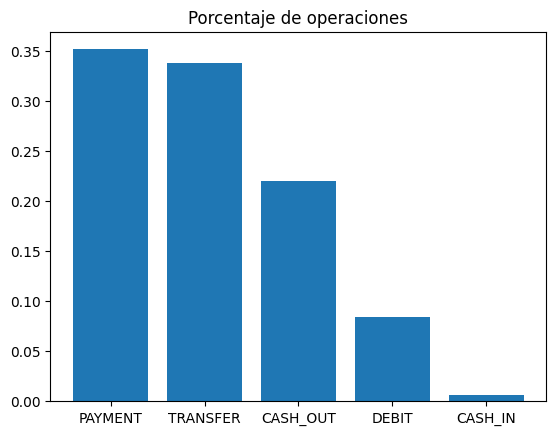

In [ ]:
# Visualizamos el porcentaje de operaciones para cada tipo
value_counts = data['type'].value_counts()

plt.bar(data['type'].unique(), height=value_counts.to_list() / value_counts.sum())
plt.title('Porcentaje de operaciones');
plt.show()

In [ ]:
# Pasamos los datos a valores numericos
data['type'] = data['type'].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [ ]:
# Correlacion de las columnas con isFraud
data.corr()['isFraud'].sort_values(ascending=False)

# amount tiene la mayor correlacion con isFraud pero es demasiado baja.

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

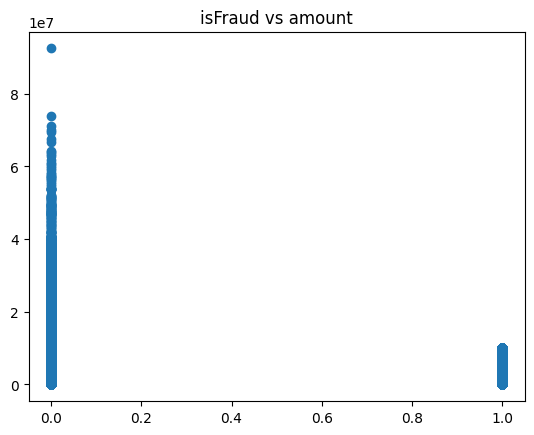

In [ ]:
# Visualizamos la comparación de datos de isFraud vs amount
plt.scatter(data['isFraud'], data['amount'])
plt.title('isFraud vs amount')
plt.show()

In [ ]:
# Último vistazo al data frame
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,0


#Desarrollo de los modelos

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

Segmentando los datos

In [ ]:
# Separamos los datos con los que vamos a predecir la variable isFraud
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [ ]:
# Reescalamos los datos X, para tenerlos entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reducimos la dimensión de los datos
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

## Regresión Logística

In [ ]:
# Entrenando la regresion logistica
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Predecir los datos de test
predictions = logistic.predict(X_test)

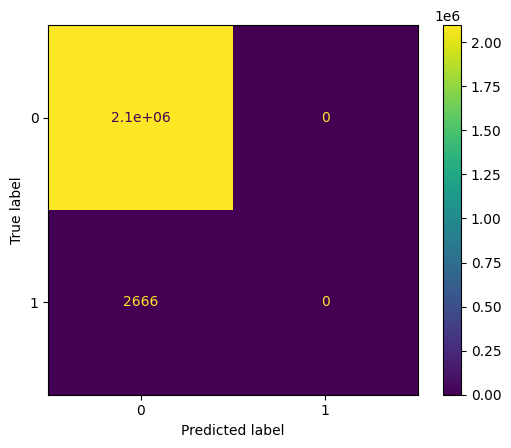

In [ ]:
# Matriz de confusion
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Podemos ver que en la clase 0 se comporta bien pero en la clase 1 es donde mas falla
print(classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       1.00      0.00      0.00      2666

    accuracy                           1.00   2099665
   macro avg       1.00      0.50      0.50   2099665
weighted avg       1.00      1.00      1.00   2099665




## Random Forest

In [ ]:
# Entrenamos el modelo
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

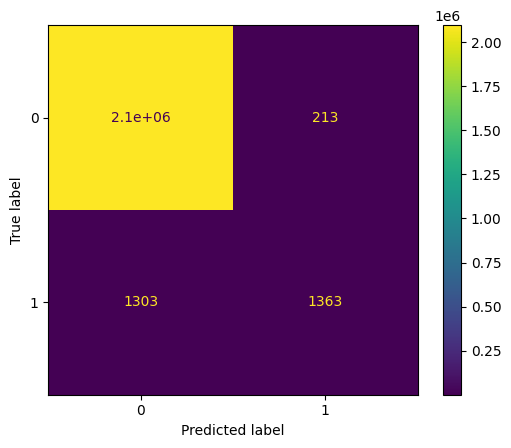

In [ ]:
# Matiz de confusión
cm = confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.86      0.51      0.64      2666

    accuracy                           1.00   2099665
   macro avg       0.93      0.76      0.82   2099665
weighted avg       1.00      1.00      1.00   2099665



Como se observa en el reporte de clasificacion anterior y en la matriz de confusion, concluimos que este Random Forest con 150 estimadores se comporto de una manera abismalmente mejor que la regresion logistica

In [ ]:
print(f'El modelo cuanta con una precision media de: {rf.score(X_test, y_test):.5f} %')

El modelo cuanta con una precision media de: 0.99928 %


#Conclusiones


Comparando los resultados de ambos modelos, queda claro que el Random Forest con 150 estimadores supera significativamente a la Regresión Logística en términos de rendimiento en la detección de fraudes en los pagos en línea. El Random Forest logra un equilibrio razonable entre la clasificación precisa de transacciones legítimas y la detección de transacciones fraudulentas, demostrando una alta precisión y recall para ambas clases. Por otro lado, la Regresión Logística muestra dificultades para identificar y clasificar correctamente las transacciones fraudulentas.

En general, el modelo de Random Forest con 150 estimadores se destaca como una opción más confiable y efectiva para aplicaciones del mundo real en la detección de fraudes en los pagos en línea, con una precisión media del 99.93%.